In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [4]:
flights=pd.read_csv('flights.csv',low_memory=True)

In [5]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
airports=pd.read_csv('airports.csv')
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
airlines=pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [8]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [10]:
columns=airports.loc[:,['LATITUDE','LONGITUDE']]

In [11]:
airports.dropna(inplace=True)

In [12]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
import gmplot
latitudes=airports.loc[:,'LATITUDE']
longitudes=airports.loc[:,'LONGITUDE']
gmap=gmplot.GoogleMapPlotter(35,102,2)
gmap.scatter(latitudes,longitudes,'red',size=5)
gmap.draw('map/gmplot.html')

In [14]:
from IPython.display import IFrame
IFrame(src='map/gmplot.html',width=900, height=600)

In [15]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

In [16]:
flights1=flights[['MONTH','DAY_OF_WEEK']]
flights1['MONTH']=flights1['MONTH'].map({1:'Jaunary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                                         9:'September',10:'October',11:'November',12:'December'})
flights1['DAY_OF_WEEK']=flights1['DAY_OF_WEEK'].map({1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',
                                                         7:'Saturday'})

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


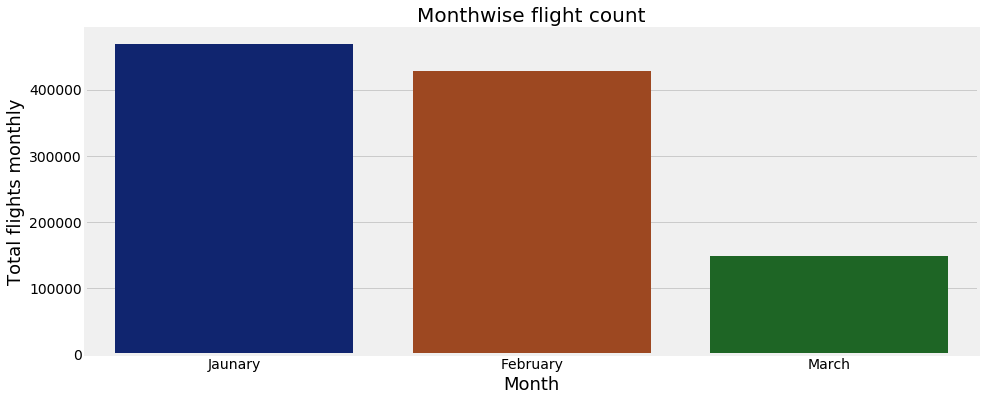

In [17]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot('MONTH',data=flights1,palette='dark',)
ax.set_xlabel(xlabel='Month',fontsize=18)
ax.set_ylabel(ylabel='Total flights monthly',fontsize=18)
ax.set_title(label='Monthwise flight count',fontsize=20)
plt.show()

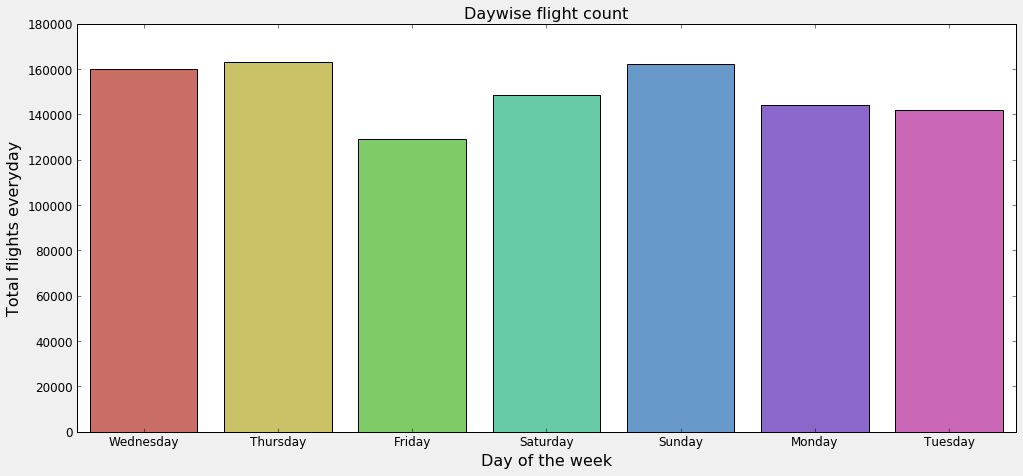

In [18]:
plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')
sns.countplot(x ='DAY_OF_WEEK',data=flights1,palette='hls')
plt.title('Daywise flight count',fontsize=16)
plt.xlabel('Day of the week', fontsize = 16)
plt.ylabel('Total flights everyday', fontsize = 16)
plt.show()

In [19]:
flights=flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                                 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                                 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                               axis=1)

In [20]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [22]:
flights=flights.fillna(flights.mean())

In [23]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,13.692554,0.057328,18.203577,22.921458,3.545277


In [24]:
result=[]

In [25]:
for row in flights['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0) 

In [26]:
flights['result'] = result

In [27]:
flights

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.000000,430,408.000000,-22.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1,1,1,LAX,PBI,10,-8.000000,750,741.000000,-9.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
2,1,1,SFO,CLT,20,-2.000000,806,811.000000,5.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
3,1,1,LAX,MIA,20,-5.000000,805,756.000000,-9.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
4,1,1,SEA,ANC,25,-1.000000,320,259.000000,-21.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,RDU,EWR,1013,-8.000000,1149,1133.000000,-16.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048571,3,10,LGA,IAH,1013,-8.000000,1337,1335.000000,-2.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048572,3,10,SAN,ORD,1013,-3.000000,1624,1627.000000,3.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048573,3,10,MSY,ORD,1013,-10.000000,1242,1229.000000,-13.000000,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0


In [28]:
flights_1=flights[['MONTH','ARRIVAL_DELAY']]
flights_1['MONTH']=flights_1['MONTH'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',
                                           8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


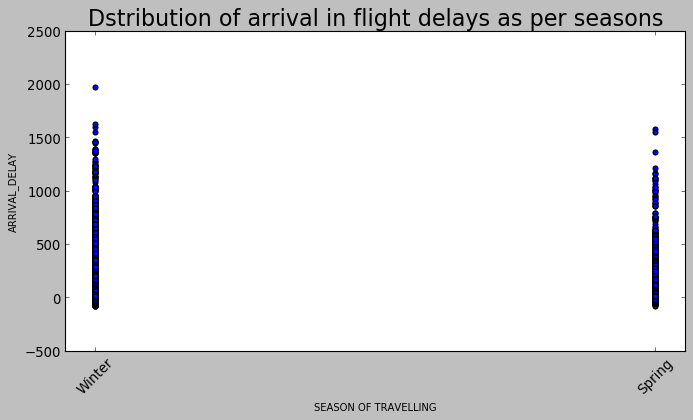

In [29]:
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(x = flights_1['MONTH'], y = flights_1['ARRIVAL_DELAY'])
plt.xlabel(xlabel = 'SEASON OF TRAVELLING', fontsize = 9)
plt.ylabel(ylabel = 'ARRIVAL_DELAY', fontsize = 9)
plt.title(label = 'Dstribution of arrival in flight delays as per seasons', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

In [30]:
flights=flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.000000,430,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1,1,1,10,-8.000000,750,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
2,1,1,20,-2.000000,806,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
3,1,1,20,-5.000000,805,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
4,1,1,25,-1.000000,320,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,1013,-8.000000,1149,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048571,3,10,1013,-8.000000,1337,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048572,3,10,1013,-3.000000,1624,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0
1048573,3,10,1013,-10.000000,1242,0,0,13.692554,0.057328,18.203577,22.921458,3.545277,0


In [31]:
sc=StandardScaler()
X=flights.drop(columns='result')
Y=flights['result']
X=sc.fit_transform(X)

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
clf.score(X_test,Y_test)

0.9995279307631786

In [35]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(30,31,1),
'min_samples_leaf' : range(35,38,1),
'min_samples_split': range(35,38,1),
'splitter' : ['best', 'random']
}

In [36]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
    param_grid=grid_param,
    cv=5,
    n_jobs =-1)

In [37]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 35, 'min_samples_split': 35, 'splitter': 'best'}


In [39]:
grid_search.best_score_

0.9990773192189399

In [40]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =30, min_samples_leaf= 35, min_samples_split= 35, splitter ='best')
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
clf.score(X_test,Y_test)

0.9992513649476671

In [ ]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open(filename, 'rb'))
print('HI there')
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,
                                     18,22,3]])
print(prediction)

HI there
[0]


In [45]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))
print('HI there')
prediction=loaded_model.predict([[1,1,5,-11,430,0,0,13,0,
                                     18,22,3]])
print(prediction)

HI there
[0]
